## Import libraries

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
from numpy import random
from matplotlib.ticker import PercentFormatter
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Generate random arrays 

In [3]:
x1 = np.linspace(1,10,5) # linspace(start,stop,parts)
x2 = random.randint(20, size=(5)) # Generate a 1-D array containing 5 random integers from 0 to 20
x3 = random.rand(5) # Generate a 1-D array containing 5 random floats from 0 to 1
x4 = random.random(size=5) # Generate a 1-D array containing 5 random floats from 0 to 1

print(x1)
print(x2)
print(x3)
print(x4)

[ 1.    3.25  5.5   7.75 10.  ]
[16 14  7  6 18]
[0.61141886 0.09634443 0.91561617 0.36055988 0.85454138]
[0.976139   0.35250698 0.28983647 0.0755813  0.90213493]


## Most basic line chart

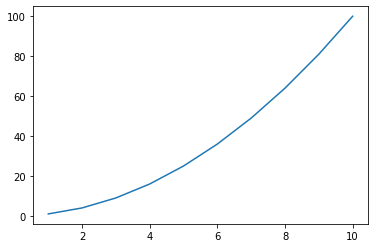

In [4]:
x = np.linspace(1,10,10) # linspace(start,stop,parts)
y = x**2
plt.plot(x,y)

## Importing a csv for a dataframe

In [5]:
sales_report = pd.read_csv("https://raw.githubusercontent.com/e55010104110/hello-world/master/Financial_Sample.csv", parse_dates=True)
sales_report["Date"] = pd.to_datetime(sales_report["Date"],format='%m/%d/%Y')
sales_report['DiscountBand'] = sales_report['DiscountBand'].str.replace(' ','')

sales_report.head()

,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,NaN,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,NaN,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,NaN,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,NaN,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,NaN,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


## Create a line chart (OO Style)

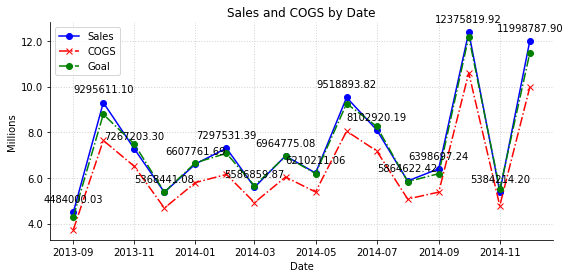

In [6]:
# Group the data first from a dataframe
prepared_table = sales_report[['Date','Sales','COGS']].groupby('Date').sum()

# Create the empty subplot (figsize in inches, width and height)
fig, ax = plt.subplots(figsize=(9, 4)) #layout='constrained')

# NOTE: When grouping data, pandas will create an index on the groupby column, so the index must be used as the x axis
ax.plot(prepared_table.index, prepared_table.Sales, label='Sales', marker='o', linestyle='solid', color="blue")  # Adding the first metric
ax.plot(prepared_table.index, prepared_table.COGS, label='COGS', marker='x', linestyle='dashdot', color="red")  # Adding the second metric
ax.plot(prepared_table.index, prepared_table.COGS * 1.15, label='Goal', marker='o', linestyle='dashdot', color="green")  # Adding a 3rd metric


# Adding labels
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Millions')  # Add a y-label to the axes.
ax.set_title("Sales and COGS by Date")  # Add a title to the axes.
ax.legend()  # If empty, it will use the labels, if labels not used, a list can be used: ax.legend(['Sales','COGS'])


# Adding data labels
for x,y in zip(prepared_table.index,prepared_table.Sales):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# Grid
ax.grid(color='lightgray', linestyle=':', linewidth=1)

# Formatting the y axis to plain notation
# Method 1, without commas:
# ax.ticklabel_format(style='plain', axis='y')

# Method 2, with commas: 
# ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Method 3, displaying abbreviated units
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

## Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


## Markers
## https://matplotlib.org/stable/api/markers_api.html



## Create a line chart (Pyplot Style)

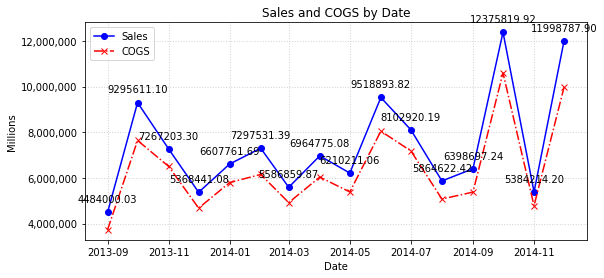

In [7]:
# Using the same table from before 

# Create the empty subplot (figsize in inches, width and height)
plt.figure(figsize=(9,4)) # layout='constrained')

# NOTE: When grouping data, pandas will create an index on the groupby column, so the index must be used as the x axis
plt.plot(prepared_table.index, prepared_table.Sales, label='Sales', marker='o', linestyle='solid', color="blue")  # Adding the first metric
plt.plot(prepared_table.index, prepared_table.COGS, label='COGS', marker='x', linestyle='dashdot', color="red")  # Adding the second metric


# Adding labels
plt.xlabel('Date')  # Add an x-label to the axes.
plt.ylabel('Millions')  # Add a y-label to the axes.
plt.title("Sales and COGS by Date")  # Add a title to the axes.
plt.legend()  # If empty, it will use the labels, if labels not used, a list can be used: ax.legend(['Sales','COGS'])


# Adding data labels
for x,y in zip(prepared_table.index,prepared_table.Sales):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


# Background color
# plt.rcParams['axes.facecolor'] = '#FEFEE3'

# Grid
plt.grid(color='lightgray', linestyle=':', linewidth=1)

# Formatting the y axis to plain notation
# Method 1, without commas:
# plt.ticklabel_format(axis="y", style="plain")

# Method 2, with commas: 
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

## Create a line chart with a secondary y axis

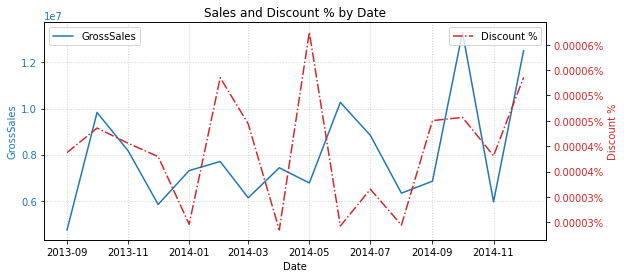

In [8]:
# Adding a percentage column to the dataframe 
sales_report['Discount %'] = sales_report['Discounts'].notna() / sales_report['GrossSales']
#format_dict = {'GrossSales':'${0:,.0f}', 'Discount %': '{:.2%}'}
grouped_table = sales_report[['Date','GrossSales','Discount %']].groupby('Date').agg({'GrossSales':'sum','Discount %': 'mean'}) #.style.format(format_dict)


# Create the empty subplot
fig, ax1 = plt.subplots(figsize=(9, 4))

# Instantiate the first axes that shares the same x-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('GrossSales', color=color)
ax1.plot(grouped_table.index, grouped_table.GrossSales, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.yaxis.set_major_formatter('${x:1.0f}')
ax1.grid(color='lightgray', linestyle=':', linewidth=1)
ax1.set_title("Sales and Discount % by Date") 
ax1.legend(['GrossSales'])


# Instantiate the secondary axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Discount %', color=color)
ax2.plot(grouped_table.index, grouped_table['Discount %'], color=color, linestyle='dashdot')
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(['Discount %'])

## Create a bar chart

<BarContainer object of 5 artists>

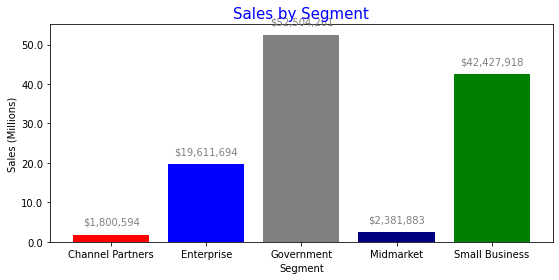

In [9]:
prepared_table_bar = sales_report[['Segment', 'Sales']].groupby('Segment').sum()
fig, ax = plt.subplots(figsize=(9, 4)) 
# Adding labels
ax.set_xlabel('Segment') 
ax.set_ylabel('Sales (Millions)') 
ax.set_title("Sales by Segment", color="blue", fontsize=15)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

# Adding data labels
for x,y in zip(prepared_table_bar.index,prepared_table_bar.Sales):

    label = "${:1,.0f}".format(y)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 color="gray",
                 xytext=(0,10),
                 ha='center') 


ax.bar(prepared_table_bar.index, prepared_table_bar.Sales, color=["red","blue","gray","navy","green"])

## Create a grouped bar chart


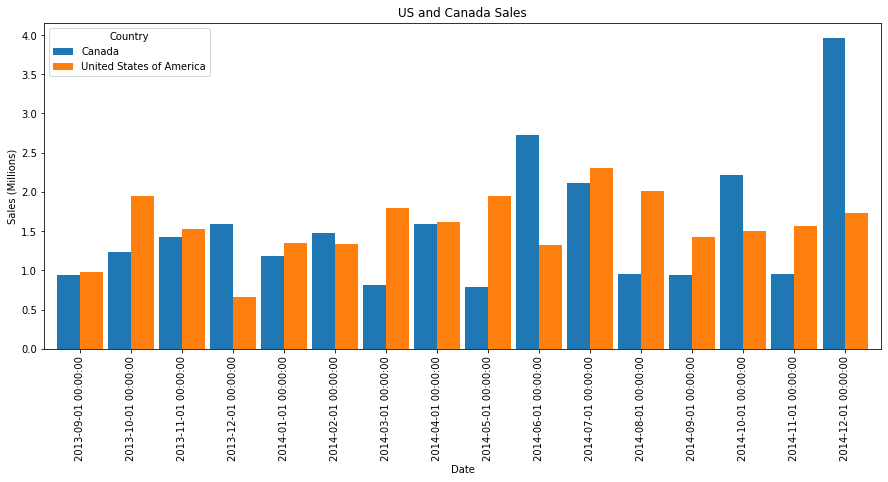

In [10]:
import matplotlib.dates as mdates
grouped_bar_chart = sales_report[(sales_report['Country']=="Canada") | (sales_report['Country']=="United States of America")]\
.pivot_table(index=sales_report.Date, columns='Country', values='Sales', aggfunc='sum')

grouped_bar_chart.plot(kind="bar", figsize=(15,6), width=.9, title="US and Canada Sales", ylabel="Sales (Millions)")\
.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))\


## Create a horizontal bar chart

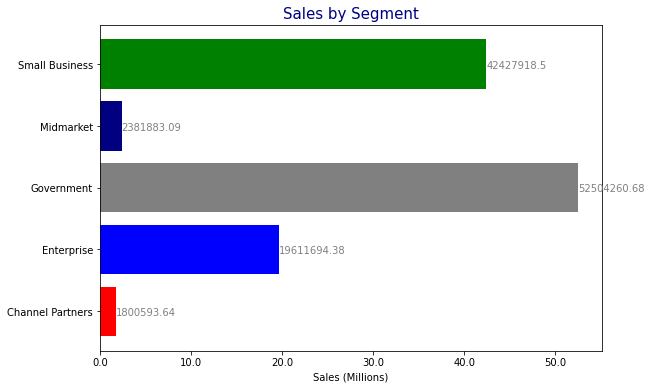

In [11]:
fig, ax = plt.subplots(figsize=(9,6))

ax.barh(prepared_table_bar.index,prepared_table_bar.Sales, align='center', color=["red","blue","gray","navy","green"])
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sales (Millions)')
ax.set_title('Sales by Segment',color="navy", fontsize=15)

# Adding data labels
for i, v in enumerate(prepared_table_bar.Sales):
    ax.text(v + 100, i, str(v), color='gray', fontsize=10, ha='left', va='center_baseline')


## Create a histogram

(array([400., 100., 200.]),
 array([  7.        , 121.33333333, 235.66666667, 350.        ]),
 <BarContainer object of 3 artists>)

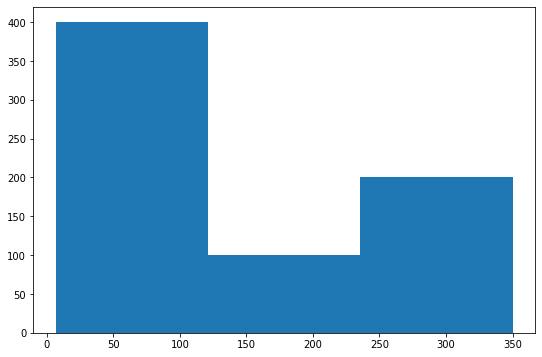

In [12]:
#discount_histograms = sales_report[['DiscountBand','Sales']].groupby('DiscountBand').count()

fig, axs = plt.subplots(figsize=(9,6))
plt.hist(sales_report['SalePrice'],bins=3, density=False, stacked=False)

Text(0.5, 1.0, 'Ocurrences of sum of dice')

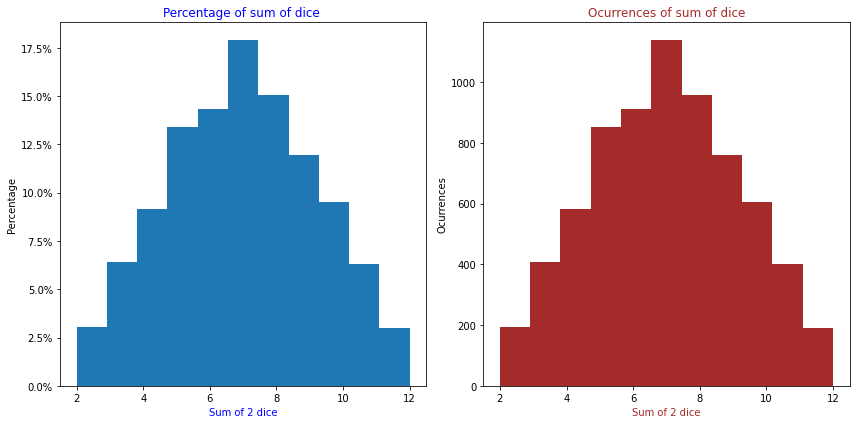

In [13]:
# Distribution of rolling the a couple of dice

die1 = np.random.randint(1,7,7000) #Rolling a die 7000 times 
die2 = np.random.randint(1,7,7000) #Rolling another die 7000 times
die_sum = die1 + die2 #Sum of the combination of dice

bins = np.unique(die_sum).size #Unique combinations of die_sum = 11

fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=False, tight_layout=True) #Use sharey=True when using the same y axis for both charts 

#First histogram with percentages
axs[0].hist(die_sum, bins=bins, density=True, stacked=False)
axs[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))

#Second histogram with occurrences
axs[1].hist(die_sum, bins=bins, density=False, stacked=True, color="brown")


# adding x and y labels and title
axs[0].set_xlabel('Sum of 2 dice', color="blue")
axs[0].set_ylabel('Percentage')
axs[0].set_title('Percentage of sum of dice ', color="blue")

axs[1].set_xlabel('Sum of 2 dice', color="brown")
axs[1].set_ylabel('Ocurrences')
axs[1].set_title('Ocurrences of sum of dice', color="brown")

## Create a histogram with line (noise)

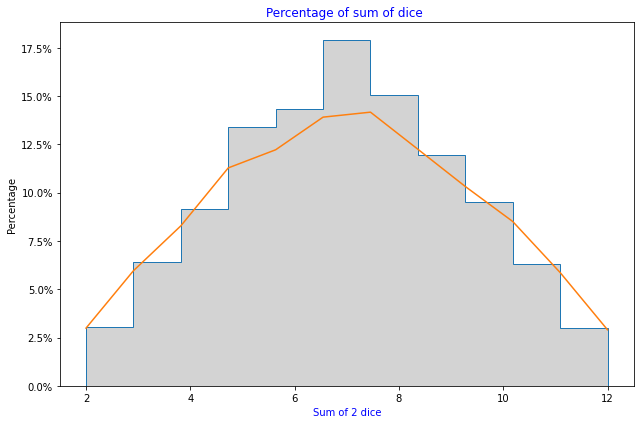

In [14]:
import scipy.stats as stats

fig, axs = plt.subplots(figsize=(9,6), tight_layout=True)

#First histogram with percentages
axs.hist(die_sum, bins=bins, density=True, stacked=False, color="lightgray")
axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))


# adding x and y labels and title
axs.set_xlabel('Sum of 2 dice', color="blue")
axs.set_ylabel('Percentage')
axs.set_title('Percentage of sum of dice ', color="blue")

density = stats.gaussian_kde(die_sum)
n, x, _ = plt.hist(die_sum, bins=bins, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))

## Create a horizontal histogram

Text(0.5, 1.0, 'Percentage of sum of dice ')

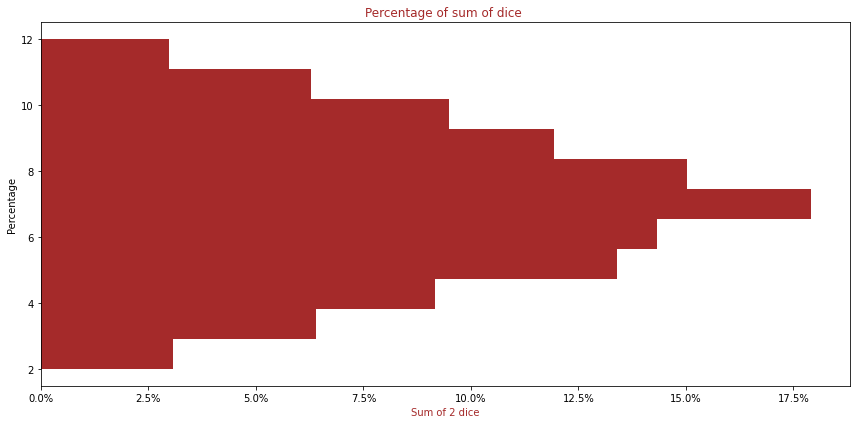

In [15]:
fig, axs = plt.subplots(figsize=(12,6), tight_layout=True)

axs.hist(die_sum, bins=bins, density=True, stacked=False, orientation="horizontal", color="brown")
axs.xaxis.set_major_formatter(PercentFormatter(xmax=1))
axs.set_xlabel('Sum of 2 dice', color="brown")
axs.set_ylabel('Percentage')
axs.set_title('Percentage of sum of dice ', color="brown")


## Create a pie chart

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

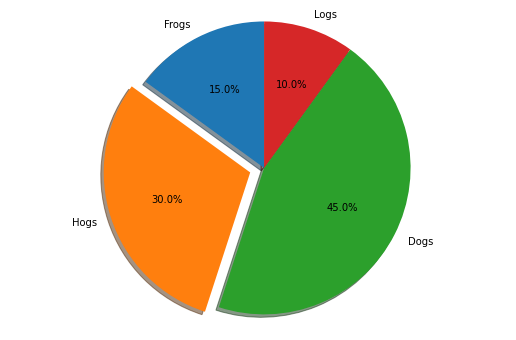

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(9,6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

(-1.1101756556965559,
 1.112713720382469,
 -1.112415380141491,
 1.1005912085781662)

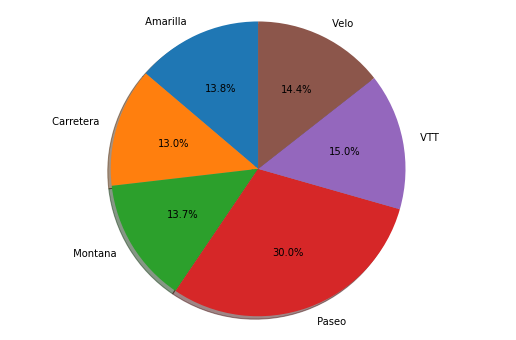

In [17]:
sales_report.head()
pie_chart_table = sales_report[['Product','UnitsSold']].groupby("Product").sum()

fig, ax = plt.subplots(figsize=(9,6))
ax.pie(pie_chart_table.UnitsSold, labels=pie_chart_table.index, shadow=True, startangle=90, autopct='%1.1f%%',)
ax.axis('equal')

## Create a scatter chart

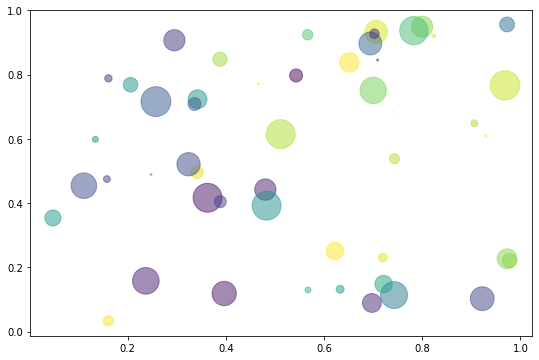

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)
fig, ax = plt.subplots(figsize=(9,6))

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

ax.scatter(x, y, s=area, c=colors, alpha=0.5)

Text(0.5, 1.0, 'Discounts and GrossSales')

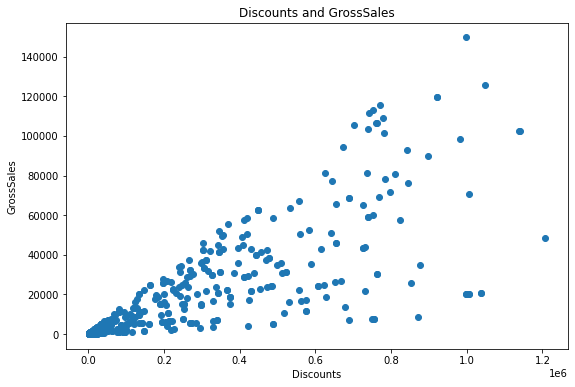

In [19]:
scatter_table = sales_report[['GrossSales','Discounts']]

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(scatter_table['GrossSales'],scatter_table['Discounts'])
plt.xlabel('Discounts') 
plt.ylabel('GrossSales')
plt.title("Discounts and GrossSales")

## Create a combo chart (bar + line)

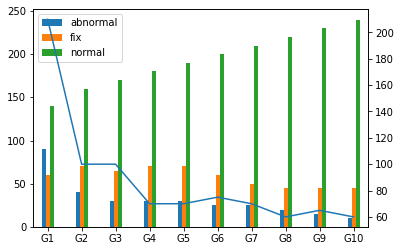

In [20]:
width = .35 # width of a bar

m1_t = pd.DataFrame({
 'abnormal' : [90,40,30,30,30,25,25,20,15,10],
 'fix' : [60,70,65,70,70,60,50,45,45,45],
 'normal' : [140,160,170,180,190,200,210,220,230,240],
 'bad_rate' : [210,100,100,70,70,75,70,60,65,60]})

m1_t[['abnormal','fix','normal']].plot(kind='bar', width = width)
m1_t['bad_rate'].plot(secondary_y=True)

ax = plt.gca()
#plt.xlim([-width, len(m1_t['normal'])-width])
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'))

plt.show()

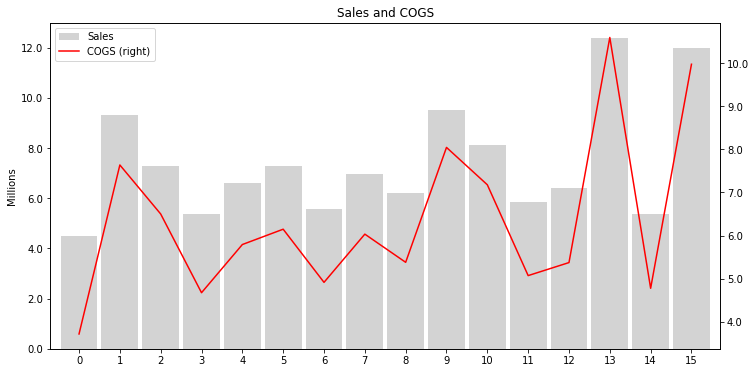

In [21]:
combo_line_bar2 = sales_report[['Date','Sales','COGS']].groupby('Date').sum()
combo_line_bar2.reset_index(drop=False, inplace=True)
combo_line_bar2 = combo_line_bar2.astype({"Date": 'object'}, errors='ignore')

# 1st metric in bars
combo_line_bar2['Sales'].plot(kind="bar", width=.9, color="lightgray", legend="Sales", ylabel="Millions", figsize=(12,6), title="Sales and COGS" )\
.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

# 2nd metric as a line
combo_line_bar2['COGS'].plot(secondary_y=True, color ="red", legend="COGS").get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))



## Create a 100% stacked bar chart

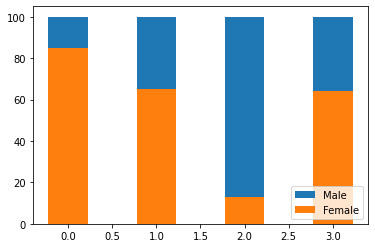

In [22]:
x = ['Kind','Elem','Sec','Spec']
male = np.array([15,35,87,36])
female = np.array([85,65,13,64])

ind = [i for i, _ in enumerate(x)]
plt.bar(ind, male, width=0.45, label="Male", bottom=female)
plt.bar(ind, female, width=0.45, label="Female")
plt.legend(loc="lower right")

## Create a stacked bar chart

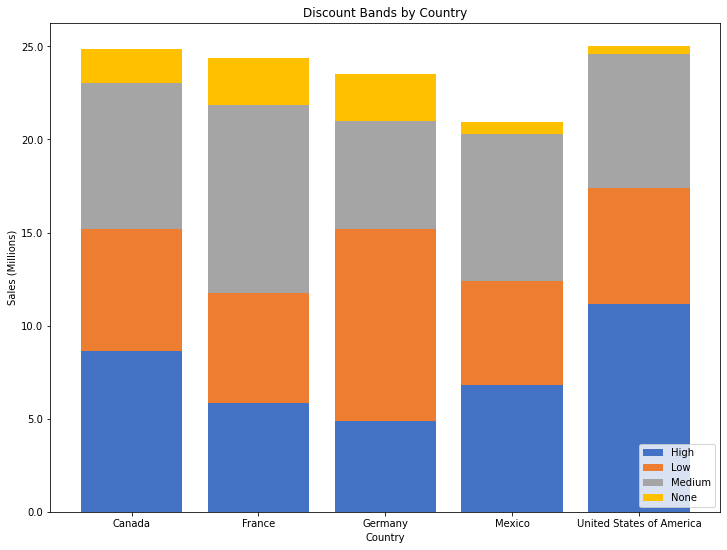

In [23]:
labels = sorted(sales_report['Country'].unique().tolist())

# 1D Arrays need to be created, that's why we call to_numpy and then flatten to each metric 
high_band = sales_report[sales_report["DiscountBand"]=="High"].groupby("Country")["Sales"].sum().to_numpy().flatten()
low_band = sales_report[sales_report["DiscountBand"]=="Low"].groupby("Country")["Sales"].sum().to_numpy().flatten()
medium_band = sales_report[sales_report["DiscountBand"]=="Medium"].groupby("Country")["Sales"].sum().to_numpy().flatten()
none_band = sales_report[sales_report["DiscountBand"]=="None"].groupby("Country")["Sales"].sum().to_numpy().flatten()


# plot bars in stack manner (notice that we need to add up each level after the 3rd stacked bar)
fig, ax = plt.subplots(figsize=(12,9))
plt.bar(labels, high_band, color='#4472C4', label="High")
plt.bar(labels, low_band, bottom=high_band, color='#ED7D31', label="Low")
plt.bar(labels, medium_band, bottom=high_band+low_band, color='#A5A5A5', label="Medium")
plt.bar(labels, none_band, bottom=high_band+low_band+medium_band, color='#FFC000', label="None")
plt.xlabel("Country")
plt.ylabel("Sales (Millions)")
plt.legend(loc="lower right")
plt.title("Discount Bands by Country")
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x)/1000000, ',')))

## Create a heatmap

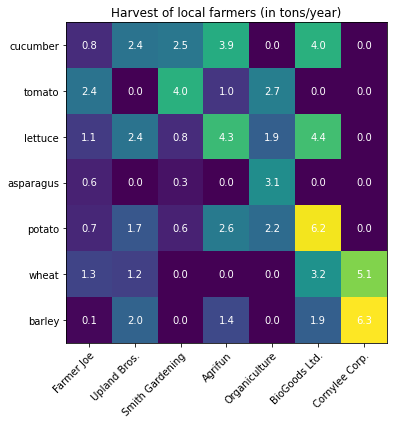

In [27]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()

In [52]:
heatmap = sales_report.pivot_table(index='Country', columns='Segment', values='UnitsSold', aggfunc='sum')
heatmap

Segment,Channel Partners,Enterprise,Government,Midmarket,Small Business
Country,,,,,
Canada,44062.0,34075.0,98412.0,37772.5,33107.0
France,33503.0,33222.0,104724.5,42926.0,26555.5
Germany,29689.0,34902.5,89080.0,21599.0,26223.5
Mexico,21163.0,28638.0,91750.0,36059.0,25715.0
United States of America,32846.5,37714.5,86707.0,33821.5,41538.0


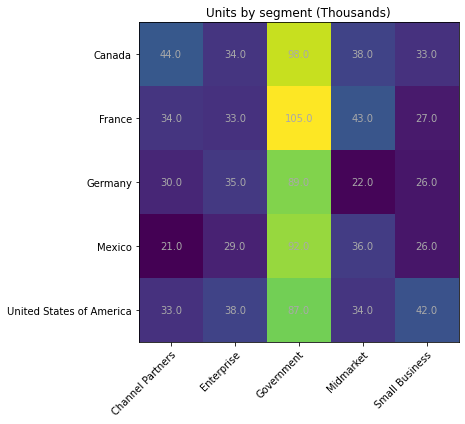

In [54]:
country = heatmap.index
segment = heatmap.columns
units = np.array(heatmap.values/1000)
units = np.around(units, decimals=False, out=None)

fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(units)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(segment)), labels=segment)
ax.set_yticks(np.arange(len(country)), labels=country)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(country)):
    for j in range(len(segment)):
        text = ax.text(j, i, units[i, j],
                       ha="center", va="center", color="darkgray")

ax.set_title("Units by segment (Thousands)")
fig.tight_layout()

## Create a boxplot chart

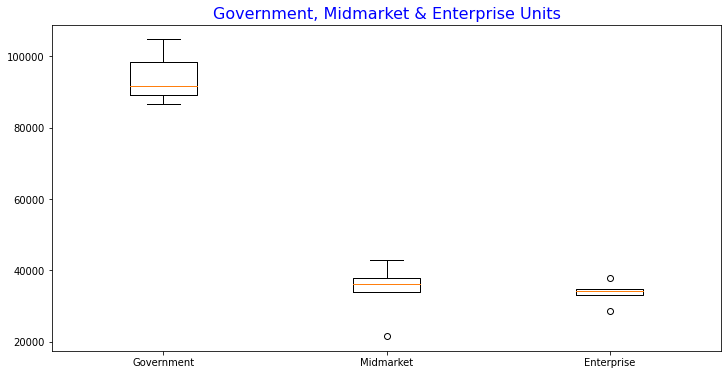

In [65]:
whiskers = heatmap[['Government','Midmarket','Enterprise']]

fig7, ax7 = plt.subplots(figsize=(12,6))
ax7.set_title('Government, Midmarket & Enterprise Units', fontsize=16, color="blue")
ax7.boxplot(whiskers,labels=whiskers.columns)
plt.show()